# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Juli Arsi Sabrina
- **Email:** juliarsisabrinaa@gmail.com / mc237d5x1623@student.devacademy.id
- **ID Dicoding:** juliarsi_s

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi metode pembayaran yang paling dominan digunakan oleh konsumen, dan bagaimana pola distribusi transaksi berdasarkan metode pembayaran yang berbeda?
- Pertanyaan 2 : Kota mana yang memiliki jumlah penjual terbanyak, dan apakah ada kota tertentu yang menjadi pusat aktivitas penjual?
- Pertanyaan 3 : Bagaimana distribusi geografis lokasi penjual dan di mana area dengan kepadatan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [32]:
df_order_payments = pd.read_csv('order_payments_dataset.csv')
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [33]:
df_sellers = pd.read_csv('sellers_dataset.csv')
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [34]:
df_geo = pd.read_csv('geolocation_dataset.csv')
df_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### Assessing Data

In [35]:
df_order_payments[df_order_payments['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


### Cleaning Data

In [36]:
df_order_payments = df_order_payments[df_order_payments['payment_type'] != 'not_defined']
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [37]:
# Menghapus duplikasi & missing values untuk dataset geolocation
df_geo.drop_duplicates(inplace=True)
df_geo.dropna(inplace=True)

print("\nJumlah data setelah cleaning:", df_geo.shape[0])


Jumlah data setelah cleaning: 738332


## Exploratory Data Analysis (EDA)

### Pertanyaan 1 : Bagaimana distribusi metode pembayaran yang paling dominan digunakan oleh konsumen, dan bagaimana pola distribusi transaksi berdasarkan metode pembayaran yang berbeda?

In [38]:
# Analisis jumlah transaksi berdasarkan metode pembayaran
print("--- Analisis Metode Pembayaran --- ")
payment_counts = df_order_payments['payment_type'].value_counts().reset_index()
payment_counts.columns = ['Jenis Pembayaran', 'Total Transaksi']
print(payment_counts)

--- Analisis Metode Pembayaran --- 
  Jenis Pembayaran  Total Transaksi
0      credit_card            76795
1           boleto            19784
2          voucher             5775
3       debit_card             1529


In [39]:
# Total transaksi yang dilakukan
total_transaksi = df_order_payments.shape[0]
print(f"\nTotal transaksi yang dilakukan: {total_transaksi}")


Total transaksi yang dilakukan: 103883


### Pertanyaan 2 : Kota mana yang memiliki jumlah penjual terbanyak, dan apakah ada kota tertentu yang menjadi pusat aktivitas penjual?


In [40]:
# Mengecek jumlah penjual unik
print("\nJumlah Penjual Unik:", df_sellers['seller_id'].nunique())


Jumlah Penjual Unik: 3095


In [41]:
# Mengecek distribusi jumlah penjual per kota
print("\nTop 10 Kota dengan Penjual Terbanyak:")
print(df_sellers['seller_city'].value_counts().head(10))


Top 10 Kota dengan Penjual Terbanyak:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64


## Pertanyaan 3 : Bagaimana distribusi geografis lokasi penjual dan di mana area dengan kepadatan tertinggi?

In [42]:
# Cek distribusi nilai longitude dan latitude
print(df_geo[['geolocation_lng', 'geolocation_lat']].describe())

       geolocation_lng  geolocation_lat
count    738332.000000    738332.000000
mean        -46.461098       -20.998353
std           4.393705         5.892315
min        -101.466766       -36.605374
25%         -48.867822       -23.603061
50%         -46.647278       -22.873588
75%         -43.836974       -19.923336
max         121.105394        45.065933


## Visualization & Explanatory Analysis

### Pertanyaan 1

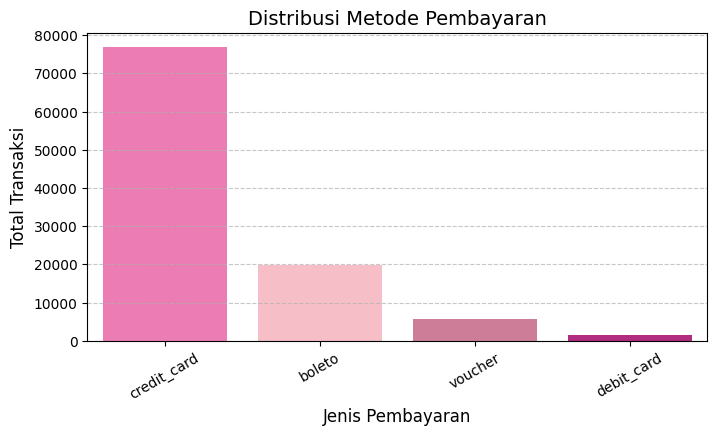


Kesimpulan:
Dari visualisasi di atas, metode pembayaran yang paling sering digunakan adalah Credit Card.


In [43]:
# Visualisasi jumlah transaksi per metode pembayaran
plt.figure(figsize=(8, 4))
sns.barplot(
    data=payment_counts,
    x='Jenis Pembayaran',
    y='Total Transaksi',
    hue='Jenis Pembayaran',  # Menetapkan hue agar warna sesuai
    dodge=False,  # Mencegah batang terpisah
    palette=['#FF69B4', '#FFB6C1', '#DB7093', '#C71585'],  # Warna girly
    legend=False  # Tidak menampilkan legenda tambahan
)

plt.title("Distribusi Metode Pembayaran", fontsize=14)
plt.xlabel("Jenis Pembayaran", fontsize=12)
plt.ylabel("Total Transaksi", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Kesimpulan
print("\nKesimpulan:")
print("Dari visualisasi di atas, metode pembayaran yang paling sering digunakan adalah Credit Card.")


In [44]:
# Distribusi nilai transaksi
def categorize_value(value):
    if value < 200:
        return 'pink'
    elif 200 <= value < 600:
        return 'lightpink'
    elif 600 <= value < 1200:
        return 'violet'
    elif 1200 <= value < 5000:
        return 'orchid'
    elif 5000 <= value < 10000:
        return 'hotpink'
    else:
        return 'magenta'

color_mapping = df_order_payments['payment_value'].apply(categorize_value)

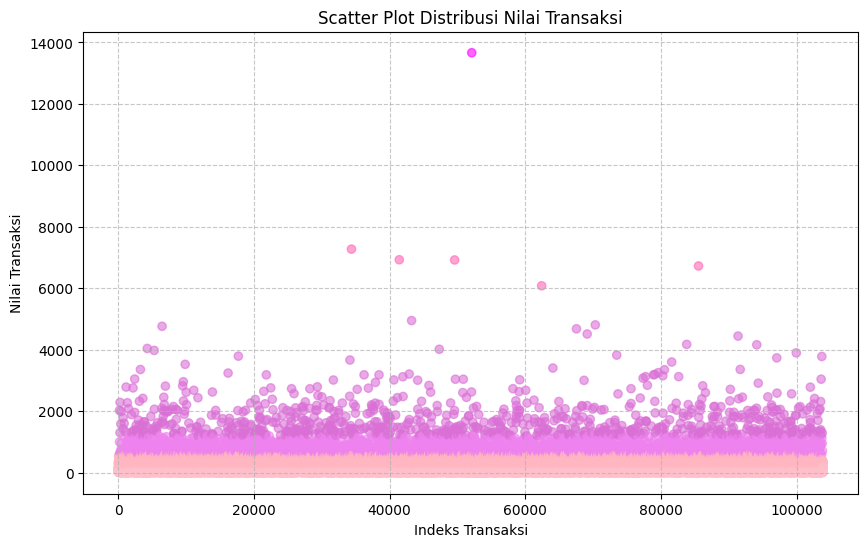


Analisis:
Dari scatter plot di atas, transaksi terbanyak berada pada rentang hingga 4000.


In [45]:
# Scatter plot distribusi nilai transaksi
plt.figure(figsize=(10, 6))
plt.scatter(df_order_payments.index, df_order_payments['payment_value'], c=color_mapping.map({'pink': 'pink', 'lightpink': 'lightpink', 'violet': 'violet', 'orchid': 'orchid', 'hotpink': 'hotpink', 'magenta': 'magenta'}), alpha=0.6)
plt.title("Scatter Plot Distribusi Nilai Transaksi")
plt.xlabel("Indeks Transaksi")
plt.ylabel("Nilai Transaksi")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nAnalisis:")
print("Dari scatter plot di atas, transaksi terbanyak berada pada rentang hingga 4000.")


### Pertanyaan 2

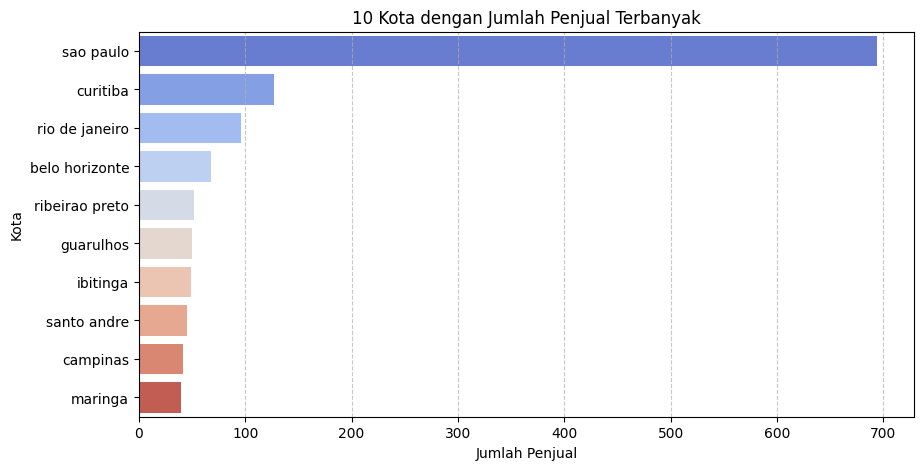

In [46]:
# Menghitung jumlah penjual per kota
top_cities = df_sellers['seller_city'].value_counts().head(10)

# Visualisasi kota dengan jumlah penjual terbanyak
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    hue=top_cities.index,
    palette=sns.color_palette("coolwarm", len(top_cities)),
    legend=False
)

plt.title("10 Kota dengan Jumlah Penjual Terbanyak")
plt.xlabel("Jumlah Penjual")
plt.ylabel("Kota")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


## Pertanyaan 3

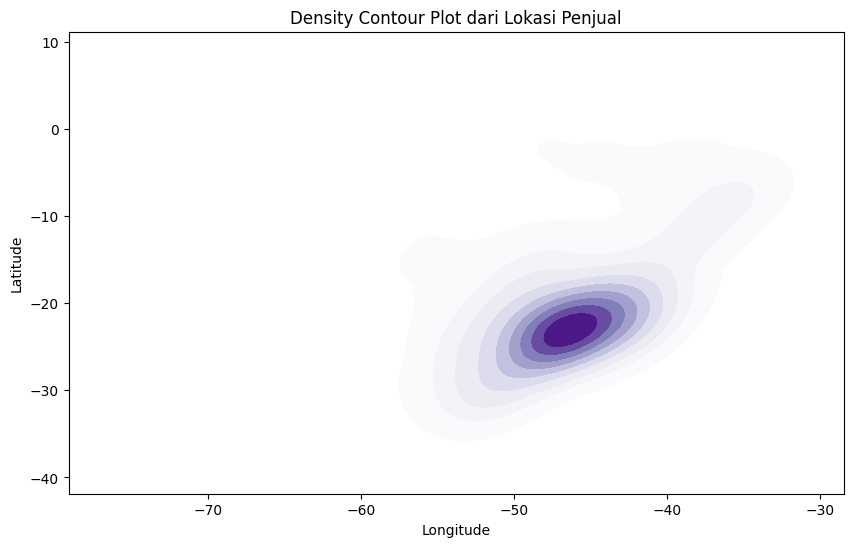


Kesimpulan:
Menunjukkan sebaran lokasi penjual dengan menggunakan estimasi
kepadatan kernel (KDE), sehingga dapat melihat area dengan konsentrasi tertinggi.


In [47]:
if 'geolocation_lat' in df_geo.columns and 'geolocation_lng' in df_geo.columns:
    # Sampling untuk mempercepat proses (mengambil 5000 sampel acak)
    df_sample = df_geo.sample(n=5000, random_state=42) if len(df_geo) > 5000 else df_geo

    # Plot KDE Density Contour
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=df_sample['geolocation_lng'],
        y=df_sample['geolocation_lat'],
        cmap="Purples",
        fill=True,
        bw_adjust=2  # Mengurangi bandwidth agar lebih cepat
    )

    plt.title("Density Contour Plot dari Lokasi Penjual")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Kesimpulan
print("\nKesimpulan:")
print("Menunjukkan sebaran lokasi penjual dengan menggunakan estimasi")
print("kepadatan kernel (KDE), sehingga dapat melihat area dengan konsentrasi tertinggi.")

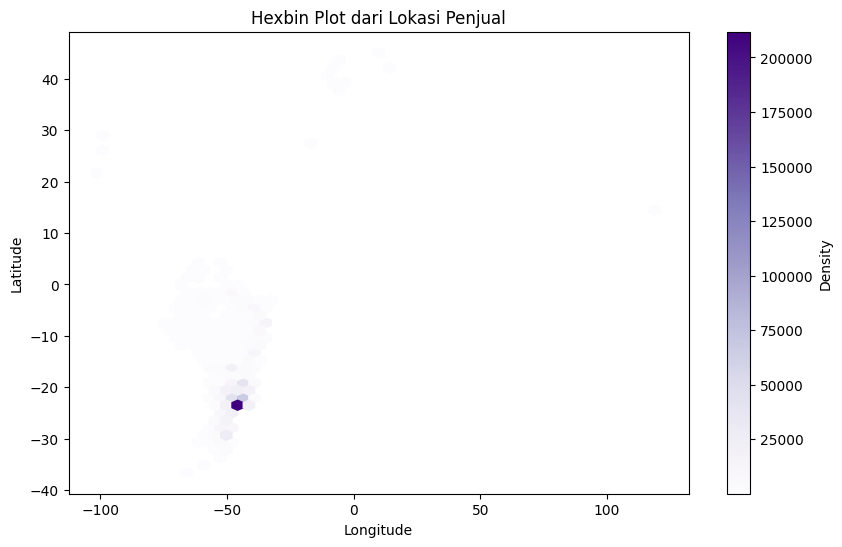


Kesimpulan:
Memberikan distribusi berbasis grid dengan intensitas warna yang
merepresentasikan jumlah penjual di setiap wilayah.


In [48]:
# Plot Hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(
    df_geo['geolocation_lng'],
    df_geo['geolocation_lat'],
    gridsize=50, cmap='Purples', mincnt=1
)
plt.colorbar(label="Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hexbin Plot dari Lokasi Penjual")
plt.show()

# Kesimpulan
print("\nKesimpulan:")
print("Memberikan distribusi berbasis grid dengan intensitas warna yang")
print("merepresentasikan jumlah penjual di setiap wilayah.")

## Conclusion

## **Conclution pertanyaan 1**
Berdasarkan hasil analisis dan visualisasi, dapat disimpulkan bahwa metode pembayaran yang paling sering digunakan oleh konsumen adalah "credit card", dengan jumlah transaksi yang paling tinggi dibanding metode lainnya.


## **Conclution pertanyaan 2**
Hasil analisis menunjukkan bahwa jumlah penjual tidak merata di semua kota. Kota dengan jumlah penjual terbanyak adalah São Paulo (SP), yang kemungkinan besar disebabkan oleh faktor ekonomi dan kepadatan penduduk yang lebih tinggi. Beberapa kota lain juga memiliki jumlah penjual yang signifikan, tetapi tidak sebanyak São Paulo.

## **Conclution pertanyaan 3**
**Analisis berdasarkan Density Contour Plot**

Grafik Density Contour Plot menunjukkan sebaran geografis lokasi penjual berdasarkan koordinat latitude dan longitude.
Area dengan warna lebih gelap menunjukkan kepadatan tertinggi dari lokasi penjual.
Dari plot ini, dapat disimpulkan bahwa mayoritas penjual berada di sekitar koordinat longitude -50 hingga -40 dan latitude -30 hingga -20, yang kemungkinan merupakan wilayah perkotaan utama di dataset ini.
Pola sebaran ini menunjukkan bahwa terdapat pusat bisnis atau area dengan aktivitas jual-beli yang lebih tinggi dibandingkan daerah lainnya.

**Analisis berdasarkan Hexbin Plot**

Hexbin Plot menampilkan kepadatan lokasi penjual dalam bentuk heksagonal dengan warna yang merepresentasikan jumlah penjual dalam suatu area tertentu.
Dari plot ini, terlihat bahwa kepadatan tertinggi berada di wilayah dengan longitude sekitar -50 dan latitude sekitar -25.
Skala warna pada legenda menunjukkan bahwa dalam area tersebut terdapat lebih dari 200.000 penjual, jauh lebih tinggi dibandingkan daerah lainnya.
Wilayah dengan kepadatan lebih rendah tersebar di area yang lebih luas, namun tidak memiliki konsentrasi sebesar area utama yang terdeteksi.
Kesimpulan Akhir